![example](images/director_shot.jpeg)

# Microsoft New Movie Studio

**Authors:** Monique Hercules 
***

## Overview


An analysis of the movie industry to gain insight on what it takes to not just make a movie, but a movie that stands the weight of time for Microsoft's new movie studio. From the insights gathered we will be able to create a template to create a successful new movie studio that will give Microsoft an inside look at current movie trends and industry standards.

The new studio can use this information to predict the best production budget, genre and studio best practices needed make a successful movie studio for Microsoft. 

That datasets used will be from notable movie databases like IMBD and The Numbers  along with a few others. 

## Business Problem

The creation of a new movie studio for Microsoft is a daunting task but with the data analysis from notable movie databases we will be able to gain some insights that answer a few questions that will assist Microsoft in its expansion. 

First question, What's the most profitable movies with inflation accounted for in comparison to production budget? We can determine the first few movies we need to make to be profitable immediately, while building Microsoft's rapport in the movie studio industry. 


Second question, what studios produced the most profit? By figuring out the studios that produced the most profit we will be able to gleam best practices that can be modeled in production and film development in Microsoft's new studio.


Third question, what genres on average produce the highest profit? This will give Microsoft a direction to focus initial efforts upon, it will be best to start off producing movies in genres people already are fond of while avoiding high stake genres topics. 


## Data Understanding
***

IMBD and The Numbers (a data movie business website) is where the datasets is from. We will be able to use this data to discern the attributes a new movie studio would need based on the various target variables, like production cost, genres, and profitability. 

These data files feature genre, title, various budgets and a wide variety of review types.

***



Importing all revelant libraries to analyze the dataframes

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cpi

cpi.update()

Imported all the dataframes to explore information contained in each 

In [2]:
movie_budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz',
                            index_col=0)

movie_gross = pd.read_csv('data/zippeddata/bom.movie_gross.csv.gz')

imdb_title_basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')

Exploration of each dataframe to have a comprenhensive idea of each dataframe as a whole 

The ```movie_budgets``` data frame feature information that will benefit the calculation of the profitability of the movies in the dataset. This data frame has the production budget along with the movie name, giving us the basis of the type of budget needed to make a profitable movie.

In [3]:
# Used this for first question. Merge two tables together, movie_budgets and
# movie_gross
movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


The ```movie_gross```  provides us with the ```title``` and ```year```, it will only need to be altered slightly to merge to the first data frame.


In [4]:
movie_gross.head()  #Used this for first question

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
imdb_title_basics.head()  # Used for second question

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


## Data Preparation

***

Data Cleaning : 

- Standardized column names,merged datasets and dropped unnecessary columns to make them easier to work with. 

- Cleaned through the various data by removing Nan variables (when applicable), commas and the symbols and while also converting data types.This made merging datasets possible.

- Combining datasets aided the creation of a few variables from ```profit_margin``` to ```profit_inflation``` to name a few.
- Inflation was taken in consideration to make the production cost and profit applicable to the current market.
***

Changing the name of "movie" to "title" in the dataframe, to merge the dataframes ```movie_budgets``` and ```movie_gross``` .This will place the movies all together in one column for easy reference. Also dropped the column ```release_date``` to clean up data

In [6]:
movie_budgets = movie_budgets.rename(columns={
    'movie': 'title'
}).drop(columns=['release_date'])
#Changing the name of the 'movie' to 'title'

Merging together the dataframes, to have the movies ```production_budget``` and ```worldwide_gross``` all together with the corresponding movie name. 

In [7]:
movie_budget_and_profit = movie_budgets.merge(movie_gross, on='title')
movie_budget_and_profit.head()
#Merging the dataframes together for all the budgets and profits

,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year
0,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",BV,241100000.0,804600000,2011
1,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",BV,459000000.0,946400000,2015
2,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",BV,678800000.0,"1,369.5",2018
3,Justice League,"$300,000,000","$229,024,295","$655,945,209",WB,229000000.0,428900000,2017
4,Spectre,"$300,000,000","$200,074,175","$879,620,923",Sony,200100000.0,680600000,2015


Currently our data has mix datatypes for money. For example ```domestic_gross_x``` is stored as text while ```domestic_gross_y``` is stored as a float. We remove the "$" and "," from ```production_budget```, ```domestic_gross_x```, and ```worldwide_gross``` in ```movie_budget_and_profit ``` to be able to perform calculations

In [8]:
#Removing '$' and ',' from money valyes
movie_budget_and_profit[
    movie_budget_and_profit.columns[1:4]] = movie_budget_and_profit[
        movie_budget_and_profit.columns[1:4]].replace('[\$|,]', '', regex=True)

# Converting strings money values into floats
movie_budget_and_profit['worldwide_gross'] = movie_budget_and_profit[
    'worldwide_gross'].astype(str).astype(float)
movie_budget_and_profit['production_budget'] = movie_budget_and_profit[
    'production_budget'].astype(str).astype(float)
movie_budget_and_profit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1246
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1247 non-null   object 
 1   production_budget  1247 non-null   float64
 2   domestic_gross_x   1247 non-null   object 
 3   worldwide_gross    1247 non-null   float64
 4   studio             1246 non-null   object 
 5   domestic_gross_y   1245 non-null   float64
 6   foreign_gross      1086 non-null   object 
 7   year               1247 non-null   int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 87.7+ KB


Subtracted the ```production_budget``` column from the ```worldwide_gross``` column producing the new column ``` Profit```. 
 

In [9]:
movie_budget_and_profit['Profit'] = movie_budget_and_profit[
    'worldwide_gross'] - movie_budget_and_profit['production_budget']
movie_budget_and_profit.sort_values('Profit')
movie_budget_and_profit.head()

# created the profit variable because I wanted to find the most profitable
# movies.

,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,Profit
0,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875,1.045664e+09,BV,241100000.0,804600000,2011,6.350639e+08
1,Avengers: Age of Ultron,330600000.0,459005868,1.403014e+09,BV,459000000.0,946400000,2015,1.072414e+09
2,Avengers: Infinity War,300000000.0,678815482,2.048134e+09,BV,678800000.0,"1,369.5",2018,1.748134e+09
3,Justice League,300000000.0,229024295,6.559452e+08,WB,229000000.0,428900000,2017,3.559452e+08
4,Spectre,300000000.0,200074175,8.796209e+08,Sony,200100000.0,680600000,2015,5.796209e+08


Created the profit_margin column  to store the  ```profit_margin``` from the ```production_budget``` versus the ```worldwide_gross```

In [10]:
movie_budget_and_profit['Profit_Margin'] = (
    movie_budget_and_profit['worldwide_gross'] -
    movie_budget_and_profit['production_budget']
) / movie_budget_and_profit['worldwide_gross']

movie_budget_and_profit.head()

,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,Profit,Profit_Margin
0,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875,1.045664e+09,BV,241100000.0,804600000,2011,6.350639e+08,0.607331
1,Avengers: Age of Ultron,330600000.0,459005868,1.403014e+09,BV,459000000.0,946400000,2015,1.072414e+09,0.764364
2,Avengers: Infinity War,300000000.0,678815482,2.048134e+09,BV,678800000.0,"1,369.5",2018,1.748134e+09,0.853525
3,Justice League,300000000.0,229024295,6.559452e+08,WB,229000000.0,428900000,2017,3.559452e+08,0.542645
4,Spectre,300000000.0,200074175,8.796209e+08,Sony,200100000.0,680600000,2015,5.796209e+08,0.658944


Accounted inflation for 2020 at for both the ```production_budget``` and the ```profit ```.

In [11]:
def inflate_budget_and_profit(column, ):
    return movie_budget_and_profit.apply(
        lambda row: cpi.inflate(row[column], row['year'], 2020), axis=1)


movie_budget_and_profit['inflation_budget'] = inflate_budget_and_profit(
    'production_budget')
movie_budget_and_profit['profit_inflation_budget'] = inflate_budget_and_profit(
    'Profit')

movie_budget_and_profit.head()

,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,Profit,Profit_Margin,inflation_budget,profit_inflation_budget
0,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875,1.045664e+09,BV,241100000.0,804600000,2011,6.350639e+08,0.607331,4.724294e+08,7.306937e+08
1,Avengers: Age of Ultron,330600000.0,459005868,1.403014e+09,BV,459000000.0,946400000,2015,1.072414e+09,0.764364,3.609991e+08,1.171024e+09
2,Avengers: Infinity War,300000000.0,678815482,2.048134e+09,BV,678800000.0,"1,369.5",2018,1.748134e+09,0.853525,3.092040e+08,1.801767e+09
3,Justice League,300000000.0,229024295,6.559452e+08,WB,229000000.0,428900000,2017,3.559452e+08,0.542645,3.167563e+08,3.758263e+08
4,Spectre,300000000.0,200074175,8.796209e+08,Sony,200100000.0,680600000,2015,5.796209e+08,0.658944,3.275854e+08,6.329178e+08


To address missing values and outliers I used a profit greater than 0 and sorted the ```most_profitable_movies``` in ascending order for easy reference.  

In [23]:
profitable_movies = movie_budget_and_profit.loc[
    movie_budget_and_profit['Profit'] > 0]

most_profitable_movies = profitable_movies.sort_values(
    by=['profit_inflation_budget'], ascending=False)

most_profitable_movies.reset_index(inplace=True)

most_profitable_movies.head()

,index,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,Profit,Profit_Margin,inflation_budget,profit_inflation_budget
0,2,Avengers: Infinity War,300000000.0,678815482,2.048134e+09,BV,678800000.0,"1,369.5",2018,1.748134e+09,0.853525,3.092040e+08,1.801767e+09
1,21,Jurassic World,215000000.0,652270625,1.648855e+09,Uni.,652300000.0,"1,019.4",2015,1.433855e+09,0.869606,2.347695e+08,1.565700e+09
2,40,Furious 7,190000000.0,353007020,1.518723e+09,Uni.,353000000.0,"1,163.0",2015,1.328723e+09,0.874895,2.074707e+08,1.450900e+09
3,91,Frozen,150000000.0,400738009,1.272470e+09,BV,400700000.0,875700000,2013,1.122470e+09,0.882119,1.666473e+08,1.247044e+09
4,250,Minions,74000000.0,336045770,1.160336e+09,Uni.,336000000.0,823400000,2015,1.086336e+09,0.936225,8.080439e+07,1.186226e+09


#### Data Modeling

## Question 1

What's the most profitable movies with inflation accounted for in  comparison to production budget?

***

This bar chart indicates the budget used to make the most profitable movie. By comparing the profit (green) to the budget (black) on the graph down below we can see how drastic the profit margin can be. This will give a gauge on what budget has been used to make a highly profitable movie. 

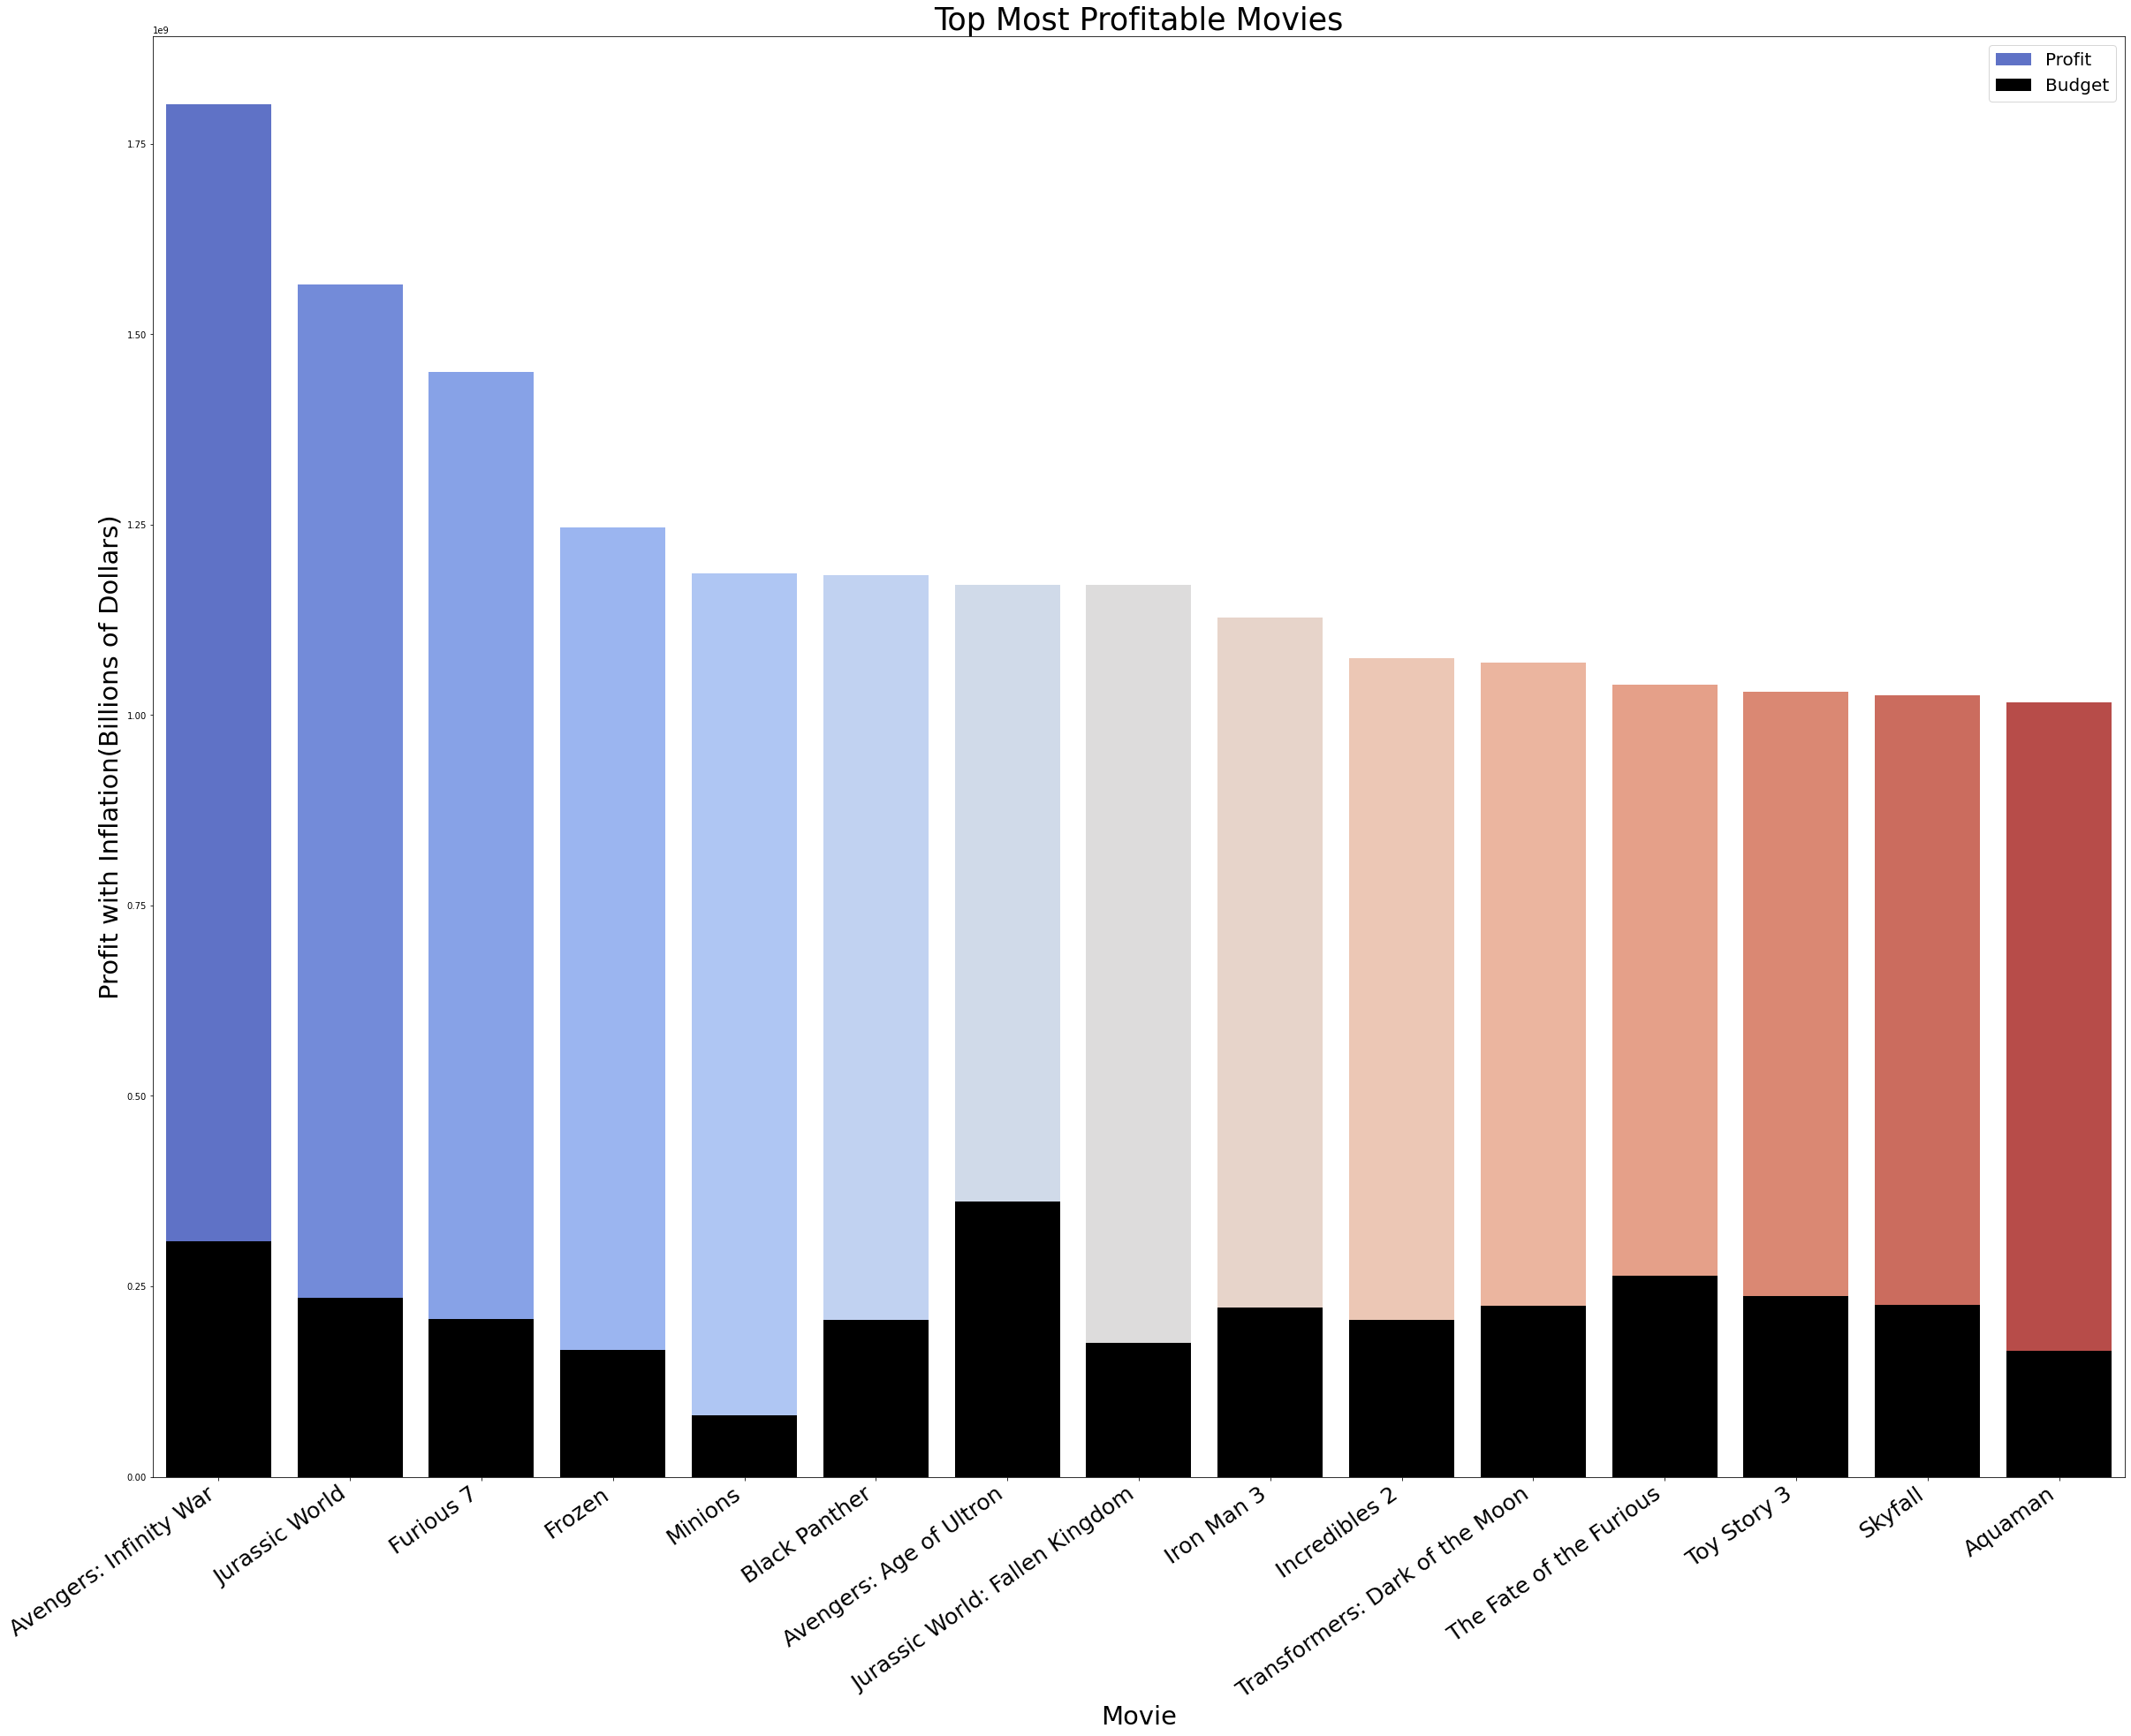

In [13]:
plt.figure(figsize=(40, 30))

sns.barplot(x=most_profitable_movies.loc[0:14, 'title'],
            y=most_profitable_movies.loc[0:15, 'profit_inflation_budget'],
            palette="coolwarm",
            label='Profit',
            ci=None)
sns.barplot(x=most_profitable_movies.loc[0:14, 'title'],
            y=most_profitable_movies.loc[0:15, 'inflation_budget'],
            color='black',
            label='Budget',
            ci=None)

plt.title('Top Most Profitable Movies', fontsize=35)
plt.xlabel('Movie', fontsize=29)
plt.ylabel('Profit with Inflation(Billions of Dollars)', fontsize=29)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=25)
plt.legend(fontsize=20)
plt.savefig('./images/mostprofitablemovies.jpeg')

Of the ```most_profitable_movies```, there is a median profit margin of 60%. The budget used on these movies had a median of $3.3 million. Avoided using the mean because did not want to be effected by the outliers. 
***

In [14]:
profitable_movies['inflation_budget'].describe()

count    9.800000e+02
mean     5.833848e+07
std      6.547194e+07
min      5.934508e+04
25%      1.333178e+07
50%      3.332946e+07
75%      7.835958e+07
max      4.724294e+08
Name: inflation_budget, dtype: float64

In [15]:
profitable_movies['Profit_Margin'].describe()

count    980.000000
mean       0.627886
std        0.233273
min        0.000265
25%        0.492405
50%        0.677003
75%        0.805713
max        0.997599
Name: Profit_Margin, dtype: float64

## Question 2 
What studio's produced the most profit? 
***

Finding the most profitable movie studio, through the ```profitable_movies```  of the variables of ```inflation_budget```, ```studio``` and ```profit_inflation_budget```

In [16]:
profitable_movies.head()

,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,Profit,Profit_Margin,inflation_budget,profit_inflation_budget
0,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875,1.045664e+09,BV,241100000.0,804600000,2011,6.350639e+08,0.607331,4.724294e+08,7.306937e+08
1,Avengers: Age of Ultron,330600000.0,459005868,1.403014e+09,BV,459000000.0,946400000,2015,1.072414e+09,0.764364,3.609991e+08,1.171024e+09
2,Avengers: Infinity War,300000000.0,678815482,2.048134e+09,BV,678800000.0,"1,369.5",2018,1.748134e+09,0.853525,3.092040e+08,1.801767e+09
3,Justice League,300000000.0,229024295,6.559452e+08,WB,229000000.0,428900000,2017,3.559452e+08,0.542645,3.167563e+08,3.758263e+08
4,Spectre,300000000.0,200074175,8.796209e+08,Sony,200100000.0,680600000,2015,5.796209e+08,0.658944,3.275854e+08,6.329178e+08


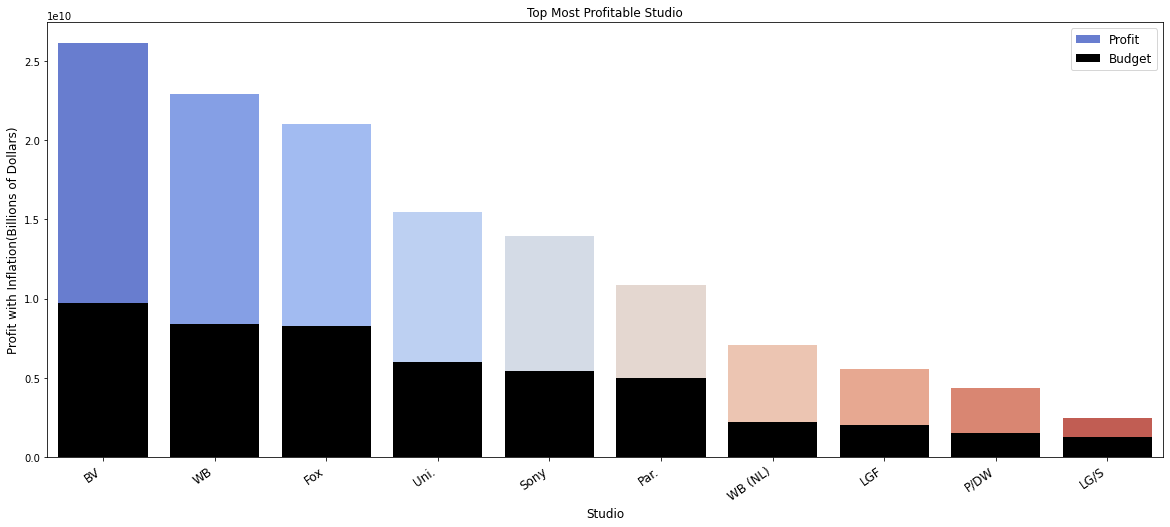

In [17]:
def group_df_by_studio(df):
    arr = []
    for row in df.itertuples():
        arr.append(
            [row.studio, row.profit_inflation_budget, row.inflation_budget])

    return pd.DataFrame(
        arr, columns=['Studio', 'Profit_Inflation', 'Budget_Inflation'])


def plot_studio_grouping(df, x_col, y_col, label, color=None, palette=None):
    studio_groupby = df.groupby(x_col).sum().sort_values(y_col,
                                                         ascending=False)
    plot_order = studio_groupby.index.values[0:10]

    sns.barplot(y=y_col,
                x=x_col,
                data=df,
                estimator=sum,
                order=plot_order,
                label=label,
                ci=None,
                color=color,
                palette=palette)


plt.figure(figsize=(20, 8))

# Calculating sorting order of studio by profit
df_studio = group_df_by_studio(most_profitable_movies)
plot_studio_grouping(df_studio, "Studio", "Profit_Inflation", "Profit", None,
                     "coolwarm")

# Calculating sorting order of studio by budget
df_studio = group_df_by_studio(most_profitable_movies)
plot_studio_grouping(df_studio, "Studio", "Budget_Inflation", "Budget",
                     "black")

plt.title('Top Most Profitable Studio')
plt.xlabel('Studio', fontsize=12)
plt.ylabel('Profit with Inflation(Billions of Dollars)', fontsize=12)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('./images/topstudios.jpeg')

Disney Buena Vista,Warner Brothers and Fox taking the lead as the most profitable movie studio. 

## Question 3 
***
What genres on average produce the highest profit?
***

Finding the genre that on average produce he highest profit, through the ```most_profitable_movies ``` of the variables of ```inflation_budget```, ```title``` and ```profit_inflation_budget```

In [18]:
most_profitable_movies.head()

,index,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,Profit,Profit_Margin,inflation_budget,profit_inflation_budget
0,2,Avengers: Infinity War,300000000.0,678815482,2.048134e+09,BV,678800000.0,"1,369.5",2018,1.748134e+09,0.853525,3.092040e+08,1.801767e+09
1,21,Jurassic World,215000000.0,652270625,1.648855e+09,Uni.,652300000.0,"1,019.4",2015,1.433855e+09,0.869606,2.347695e+08,1.565700e+09
2,40,Furious 7,190000000.0,353007020,1.518723e+09,Uni.,353000000.0,"1,163.0",2015,1.328723e+09,0.874895,2.074707e+08,1.450900e+09
3,91,Frozen,150000000.0,400738009,1.272470e+09,BV,400700000.0,875700000,2013,1.122470e+09,0.882119,1.666473e+08,1.247044e+09
4,250,Minions,74000000.0,336045770,1.160336e+09,Uni.,336000000.0,823400000,2015,1.086336e+09,0.936225,8.080439e+07,1.186226e+09


Choose to use the ``` imdb_title_basics``` for variables, ```primary_title``` and ```genres```

In [19]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Cleaned data for easy merging of the tables to determine all the genres

In [20]:
# Row above talking about how you cleaned the data
genre_by_title = imdb_title_basics.rename(columns={'primary_title': 'title'})
genre_by_title = genre_by_title.dropna()

genre_by_title.head()
#merged dataframes together to get genre

,tconst,title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy


Merged the tables ```most_profitable_movies``` and ```genre_by_title``` to have all the ```genres``` and ```title``` together with the ```profit_inflation_budget ```and```inflation_budget``` in the same table.

In [21]:
genre_with_profit = most_profitable_movies.merge(genre_by_title, on='title')
genre_with_profit.head(5)

,index,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,Profit,Profit_Margin,inflation_budget,profit_inflation_budget,tconst,original_title,start_year,runtime_minutes,genres
0,2,Avengers: Infinity War,300000000.0,678815482,2.048134e+09,BV,678800000.0,"1,369.5",2018,1.748134e+09,0.853525,3.092040e+08,1.801767e+09,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
1,21,Jurassic World,215000000.0,652270625,1.648855e+09,Uni.,652300000.0,"1,019.4",2015,1.433855e+09,0.869606,2.347695e+08,1.565700e+09,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"
2,40,Furious 7,190000000.0,353007020,1.518723e+09,Uni.,353000000.0,"1,163.0",2015,1.328723e+09,0.874895,2.074707e+08,1.450900e+09,tt2820852,Furious Seven,2015,137.0,"Action,Crime,Thriller"
3,91,Frozen,150000000.0,400738009,1.272470e+09,BV,400700000.0,875700000,2013,1.122470e+09,0.882119,1.666473e+08,1.247044e+09,tt1323045,Frozen,2010,93.0,"Adventure,Drama,Sport"
4,91,Frozen,150000000.0,400738009,1.272470e+09,BV,400700000.0,875700000,2013,1.122470e+09,0.882119,1.666473e+08,1.247044e+09,tt1611845,Wai nei chung ching,2010,92.0,"Fantasy,Romance"


Created the graph of "Genres Vs Profit with inflation" to showcase the genres on average  that make the most profit as well as the less amount of profit. Accounting for the margin error on profit inflation on each genre with the whisker tips. 

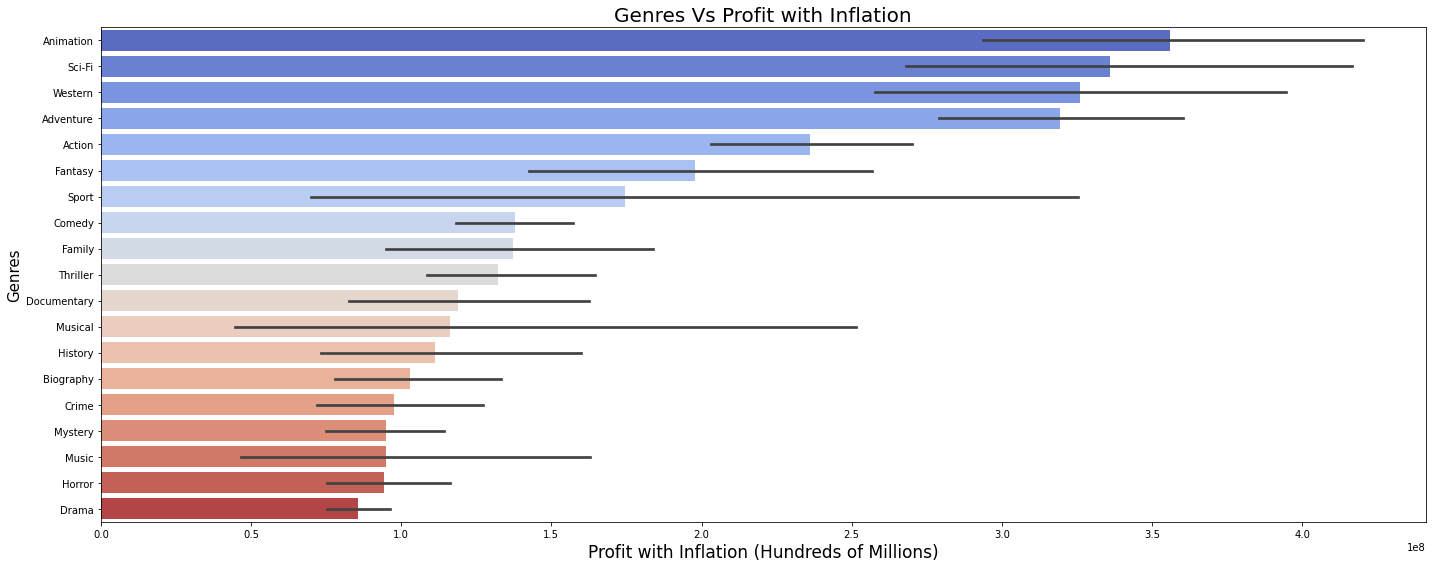

In [22]:
# Created dictionary containing gross profit per genre
genres_to_profit_list = []
for row in genre_with_profit.itertuples():
    for genre in row.genres.split(","):
        genres_to_profit_list.append([genre, row.profit_inflation_budget])

# Building a data frame out of genres_to_profit_dict dictionary
df_genres = pd.DataFrame(genres_to_profit_list,
                         columns=['Genres', 'Profit_Inflation'])

# Calculating sorting order of genres by profit
genres_groupby_mean = df_genres.groupby('Genres').mean().sort_values(
    'Profit_Inflation', ascending=False)

# Reducing graph to top 19 genres
plot_order = genres_groupby_mean.index.values[:19]

# Plot the graph
from numpy import mean

plt.figure(figsize=(20, 8))
ax = sns.barplot(x='Profit_Inflation',
                 y='Genres',
                 data=df_genres,
                 order=plot_order,
                 estimator=mean,
                 palette="coolwarm")

plt.xlabel("Profit with Inflation (Hundreds of Millions)", size=17)
plt.ylabel("Genres", size=15)
plt.title("Genres Vs Profit with Inflation", size=20)
plt.tight_layout()
plt.savefig('./images/Ascending_Genres_Vs_Profit_with_Inflation.jpeg', dpi=100)

## Conculsion

After doing the analysis, the three recommendations for Microsofts creation of the new movie studio:

* **Aim for a movie budget around 300 million to be on average with making a profit margin over 60%.**

* **Base best practices for the creation of the studio on the most profitable studios of  Disney Buena Vista, Warner Brothers,and Fox.**

* **Animation, Western, and Sci-Fi are the most profitable genres with similar margin of error. Making each of these movie genres the most desirable genres to invest into.** 
Musicals and Sports have the highest margin of error, which make it a tough movie genre to have a predictable profit range.While drama has the lowest error of margin and average profit with inflation of almost 100 million.Making it a conservative movie genre for a new studio to make.


## Next Steps 


Attributes for Microsoft to consider for further analysis: 

* **The most profitable movies are Avengers: Infinity War, Jurassic World and Furious 7**. Considering that all of these movies are part of a  larger movie universe that have been produced over a set amount of time with a dedicated fan base. We can be left to assume that a lot of the profit margin is from an already dedicated fan base. By starting off with a movie that has a universe where we can create a dedicated fan base that spans an entire universe large enough to grow a large diverse character set.

* **Based on these studios we will be able to gleam best practices, but we must be aware that studios do have certain talents that are exclusive to them.** These will skew the data for profitable studios, because the movies produced could have only been profitable due to the use of a classic fan favorite actor/actress. This would be a further analysis needed to base the success of a movie due to the main lead. 

* **Keep in mind the some movies have multiple genres while others only have one so that data will be skewed.** Further study would be needed to discern deeper insights based of movies with only one genre versus movies with several.  
